## NOTEBOOK 1
## Giorgio Stucchi - 969107

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Exercise 01.1

To examine the Pseudo-Random Number generator's performance, we calculate two essential quantities: the average value $\langle r \rangle$, obtained by integrating $r$ from 0 to 1, which yields 1/2, and the variance $\sigma^2$, derived from integrating $(r-1/2)^2$ from 0 to 1, resulting in 1/12. In this case, 'r' represents a random variable drawn from a uniform distribution spanning the interval [0,1).

For the analysis, we have selected specific parameters: a total of $N=100000$ throws and $M=1000$ throws per block. Utilizing these parameters, we compute 100 estimates for each quantity, corresponding to $N/M$.

The evolving mean value and its associated uncertainty are graphed against the number of throws. Remarkably, the computed values align with the expected outcomes within the calculated uncertainties (Figures 1 & 3). Furthermore, when plotting only the uncertainty against the number of blocks, we observe the anticipated power law scaling, with $n=-1/2$ (Figures 2 & 4).

While a more comprehensive and meticulous analysis will be conducted in subsequent exercises, it is worthwhile to provide an initial commentary on the blocking method and its parameters $(M,N)$. Fundamentally, the blocking method primarily serves as a data processing approach that applies the Central Limit Theorem (CLT). Additionally, the blocking method enables the possibility of reducing/eliminating correlations between various estimates of the quantity.

Once the block size is established, it becomes evident that increasing the number of blocks leads to enhanced results due to the scaling of uncertainties.

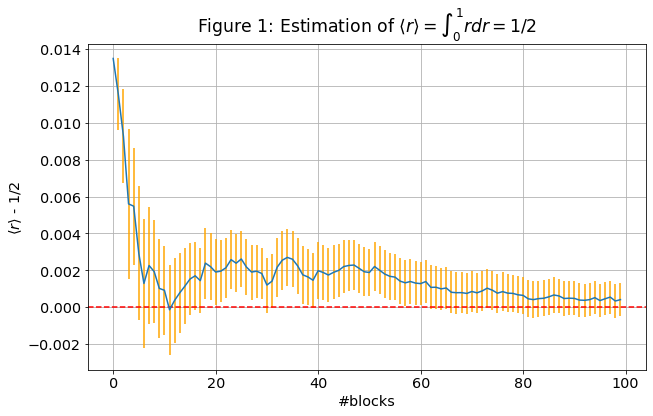

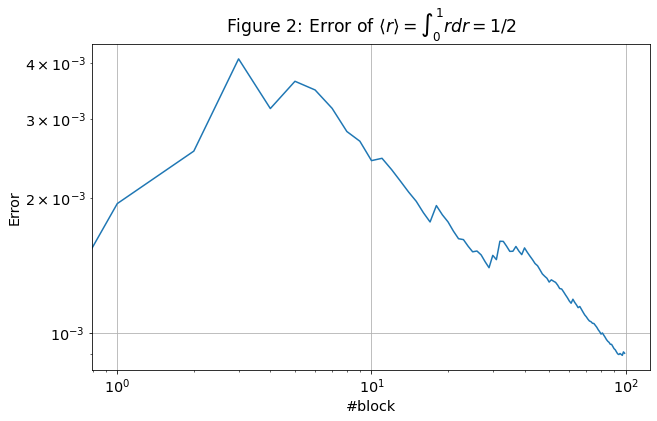

In [17]:
x = np.arange(100)
f, error = np.loadtxt("data_exercise_1.1.1.txt", usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,f - 0.5,yerr=error, ecolor='orange')
plt.axhline(0.0, color = 'red', linestyle = 'dashed')
plt.title(r'Figure 1: Estimation of $\langle r \rangle = \int_0^1 r dr = 1/2$')
plt.xlabel('#blocks')
plt.ylabel(r'$\langle r \rangle$ - 1/2')
plt.grid(True)
plt.show()

plt.plot(x,error)
plt.yscale('log')
plt.xscale('log')
plt.title(r'Figure 2: Error of $\langle r \rangle = \int_0^1 r dr = 1/2$')
plt.xlabel('#block')
plt.ylabel(r'Error')
plt.grid(True)
plt.show()

The plot shows the expected behaviour: extracting numbers between 0 and 1 with the random generator correctly emulates the uniform distribution, as proven by the proximity of the integral's best estimate to 1/2, i.e. it's exact value. The standard deviation of the mean is also seen to diminish as the number of blocks increases. Note that the usage of 100 blocks to compute the best estimate instead of the usage of 'simple' throws without any grouping of sorts makes it possible to avoid any correlations of the random number generator.

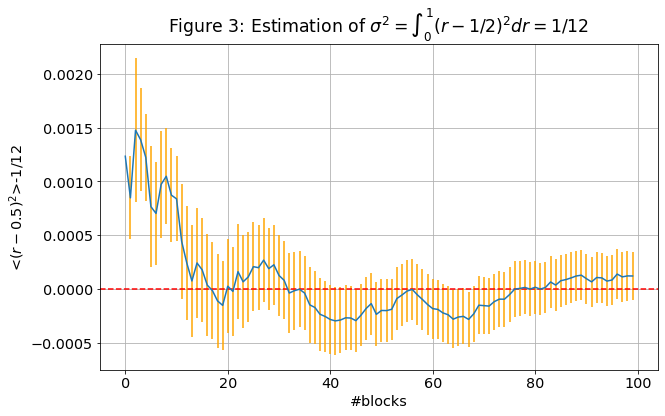

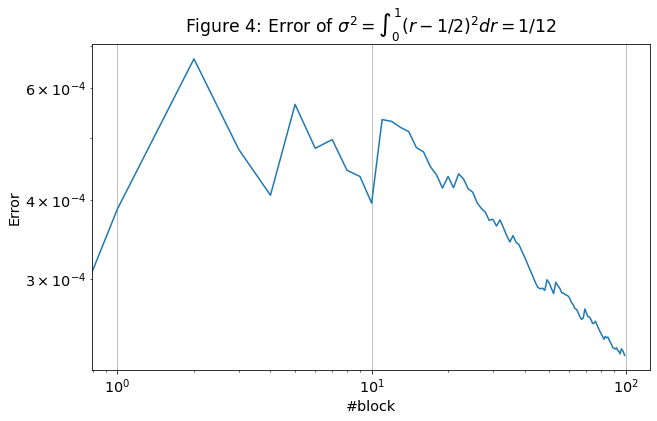

In [15]:
x = np.arange(100)
f, error = np.loadtxt("data_exercise_1.1.2.txt", usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,f - 1/12,yerr=error, ecolor='orange')
plt.title('Figure 3: Estimation of $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$')
plt.xlabel('#blocks')
plt.axhline(0.0, color = 'red', linestyle = 'dashed')
plt.ylabel('<$(r-0.5)^2$>-1/12')
plt.grid(True)
plt.show()

plt.plot(x,error)
plt.yscale('log')
plt.xscale('log')
plt.title('Figure 4: Error of $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$')
plt.xlabel('#block')
plt.ylabel(r'Error')
plt.grid(True)
plt.show()

The same considerations of the previous exercise apply to this one. Once again, the correspondance between exact value and computed result is not violated.

To ensure the effectiveness of our pseudo-random generator, it is necessary to assess the quality of the generated distribution. Directly proving that a set of numbers is drawn from a specific random distribution is not feasible, so we employ an indirect method that evaluates the probability of the set not conforming to the given distribution. In this case, the $\chi^2$ test serves as an appropriate approach.

In this particular scenario, our objective is to verify whether our random (0,1) uniform generator accurately produces values following a uniform distribution. To achieve this, we apply the $\chi^2$ test in the following manner:
- $N=10000$ numbers are randomly generated in the interval [0,1) and binned into $M=100$ sub-intervals (of equal width);
- being $E_i$ and $O_i$ the expected and observed contents of the i-bin, respectively, $\chi^2$ is computed as:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
where $O_i=N/M$;
- These two steps are repeated 100 times to obtain 100 values of $\chi^2$.


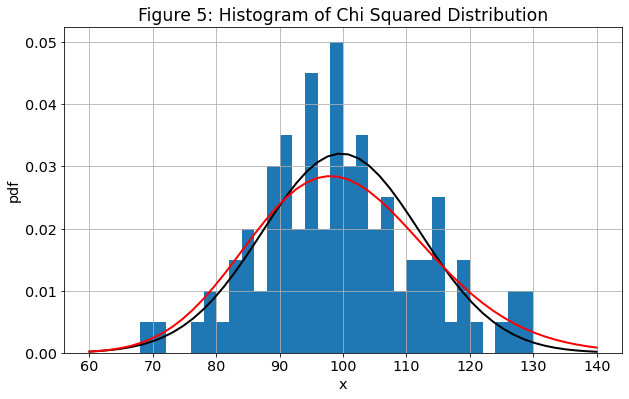

In [133]:
from scipy.stats import norm
from scipy.stats import chi2
data = np.loadtxt("data_100_chi_squared.txt")

# the histogram of the data (normalized)

plt.hist(data, 40, range=(60,140), density=True)

plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Figure 5: Histogram of Chi Squared Distribution')
plt.grid(True)

# Fit Gaussian distribution to data
mu, std = norm.fit(data)

# Plot fitted Gaussian function
x = np.linspace(60, 140,50)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

df=100

# Plot fitted Chi2 function
x = np.linspace(60, 140,50)
p = chi2.pdf(x, df)
plt.plot(x, p, 'r', linewidth=2)

plt.show()

The fitting was done with a Gaussian PDF because N is large enough; therefore the $\chi^2$ distribution closely resembles the normal distribution. The plot confirms this supposition. A $\chi^2$ fitting was also done in red.

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

We import data of simulated distribution from C++ results and plot them, then fit them with appropriate pdf. The values of the simulation for the Gaussian are $\mu = 0$ and $\sigma = 1$.

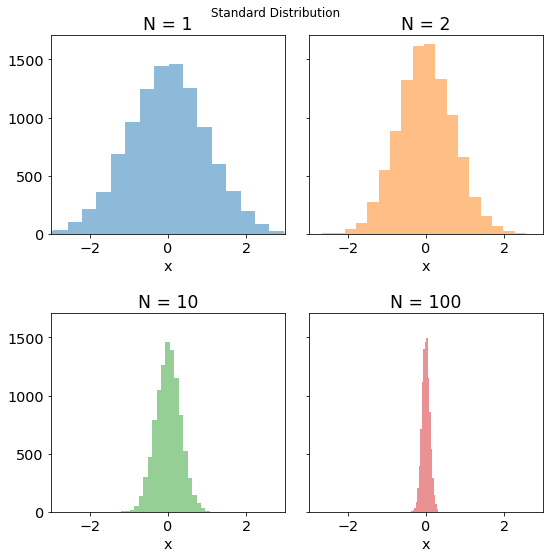

In [68]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

data_list = [np.loadtxt("10000standard_distr_N=1.txt"),
             np.loadtxt("10000standard_distr_N=2.txt"),
             np.loadtxt("10000standard_distr_N=10.txt"),
             np.loadtxt("10000standard_distr_N=100.txt")]
ns = [1, 2, 10, 100]

# Create subplots with two rows and two columns
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)

# Loop over the subplots and plot the histograms
for i, ax in enumerate(axs.flatten()):
    ax.hist(data_list[i], bins=20, alpha=0.5, color='C'+str(i) )#density=True)
    ax.set_title('N = '+ str(ns[i]))
    ax.set_xlabel('x')
    ax.set_xlim(-3, 3)
    ax.margins(x=0)  # Remove extra margins on the x-axis

fig.tight_layout(pad=2.0)  # Add vertical spacing between subfigures

fig.suptitle("Standard Distribution")
plt.show()

0.0004893897884899999 0.10024007936778104


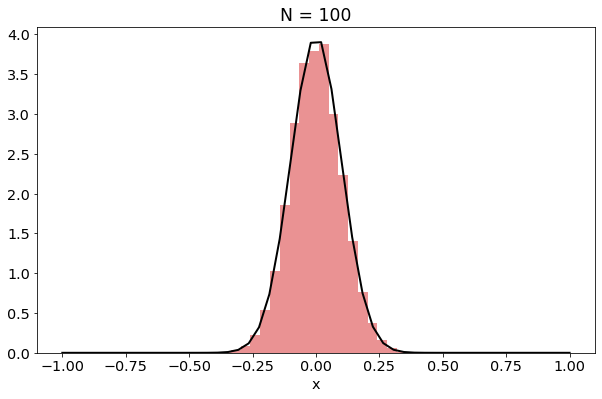

In [69]:
plt.hist(data_list[3], bins=20, alpha=0.5, color='C'+str(i),density=True)
plt.title('N = '+ str(ns[3]))
plt.xlabel('x')
    
mu, std = norm.fit(data_list[3])
x = np.linspace(-1,1,50)
p = norm.pdf(x, mu, std)
print(mu, std)
plt.plot(x, p, 'k', linewidth=2)

Of course, in this example, we expected an optimal fit whatever value N may have had. That is, the number of two gaussian variables is already exactly gaussian because of the stability of the gaussian pdf, so there is no need to take the limit to arrive at the gaussian form.

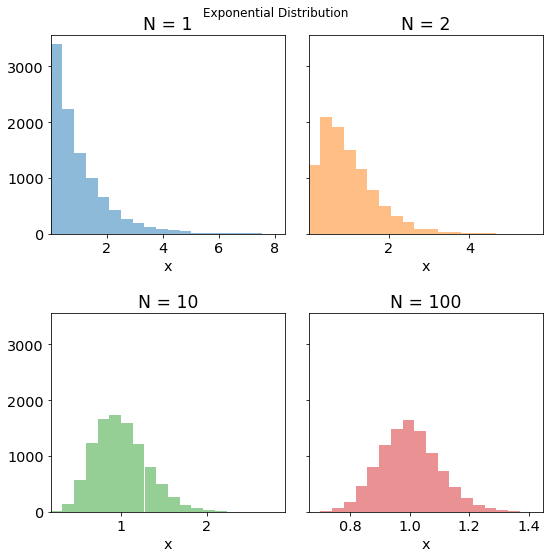

In [71]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

data_list = [np.loadtxt("10000exponential_distr_N=1.txt"),
             np.loadtxt("10000exponential_distr_N=2.txt"),
             np.loadtxt("10000exponential_distr_N=10.txt"),
             np.loadtxt("10000exponential_distr_N=100.txt")]
ns = [1, 2, 10, 100]

# Create subplots with two rows and two columns
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)

# Loop over the subplots and plot the histograms
for i, ax in enumerate(axs.flatten()):
    ax.hist(data_list[i], bins=20, alpha=0.5, color='C'+str(i) )#density=True)
    ax.set_title('N = '+ str(ns[i]))
    ax.set_xlabel('x')
    #ax.set_xlim(-1, 2)
    ax.margins(x=0)  # Remove extra margins on the x-axis

fig.tight_layout(pad=2.0)  # Add vertical spacing between subfigures

fig.suptitle("Exponential Distribution")
plt.show()

0.998551447 0.10003387614806392


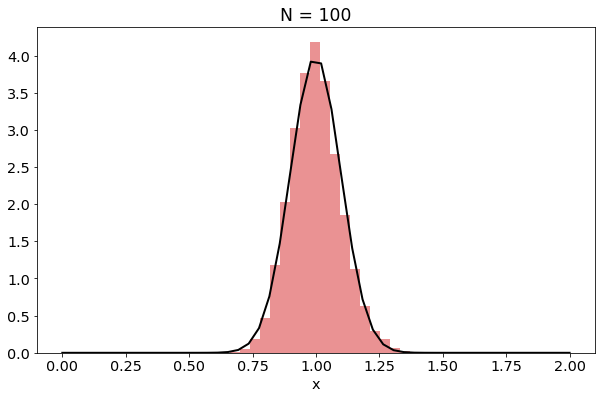

In [66]:
plt.hist(data_list[3], bins=20, alpha=0.5, color='C'+str(i),density=True)
plt.title('N = '+ str(ns[3]))
plt.xlabel('x')
    
mu, std = norm.fit(data_list[3])
x = np.linspace(0,2,50)
p = norm.pdf(x, mu, std)
print(mu, std)
plt.plot(x, p, 'k', linewidth=2)

In this case, we can test the thesis of the Central Limit Theorem, as the variance of exponential pdf is limited. The plots show that as N grows, the resulting pdf resembles a gaussian shape more and more. The parameter for the simulation was $\lambda = 1$, which agrees with the result of the fitting.

Text(0.5, 0.98, 'Cauchy Lorentz Distribution')

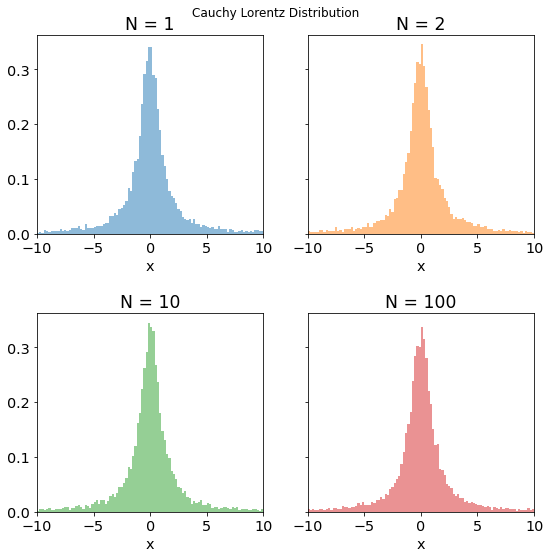

In [126]:
from scipy.stats import cauchy

data_list = [np.loadtxt("10000Cauchy Lorentz_distr_N=1.txt"),
             np.loadtxt("10000Cauchy Lorentz_distr_N=2.txt"),
             np.loadtxt("10000Cauchy Lorentz_distr_N=10.txt"),
             np.loadtxt("10000Cauchy Lorentz_distr_N=100.txt")]
ns = [1, 2, 10, 100]

# Create subplots with two rows and two columns
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)

# Loop over the subplots and plot the histograms
for i, ax in enumerate(axs.flatten()):
    ax.hist(data_list[i], bins=100, alpha=0.5, color='C'+str(i), density=True,range=(-10, 10))
    ax.set_title('N = '+ str(ns[i]))
    ax.set_xlabel('x')
    ax.set_xlim(-10, 10)
    ax.margins(x=0)  # Remove extra margins on the x-axis

fig.tight_layout(pad=2.0)  # Add vertical spacing between subfigures

fig.suptitle("Cauchy Lorentz Distribution")

0.0005068968465497973 0.9919479565128587


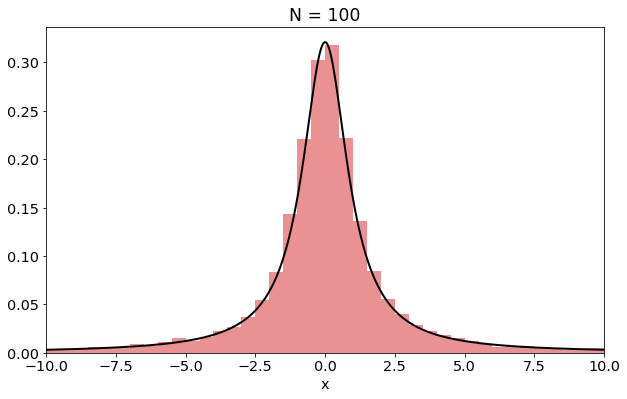

In [127]:
plt.hist(data_list[3], bins=40, range=(-10, 10), alpha=0.5, color='C'+str(i),density=True)
plt.title('N = '+ str(ns[3]))
plt.xlim(-10, 10)
plt.xlabel('x')

x0, gamma = cauchy.fit(data_list[3])
x = np.linspace(-10,10,1000)
p = cauchy.pdf(x, x0, gamma)
plt.plot(x, p, 'k', linewidth=2)
print(x0,gamma)

This last example falls outside of the domain of competence of the CLT, because the variance of the Cauchy-Lorentz pdf is unlimited (infinite). We also know that the CL distribution is stable, therefore we expect CL distribution for the sum of the CL variables. That is indeed what we find in the plots.

### Buffon's experiment
- A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This can be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
We show a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $N$ as a function of the number of blocks, $M$</font>. In order not to use $\pi$ to evaluate $\pi$, we exctract angles between DBL_MAX and -DBL_MAX in C++. In this manner, the error we commit is at most PI/DBL_MAX (DBL_MAX is at most pi away from the nearest pi multiple), which is negligible. Values chosen for L and d are 1 and 0.5 respectively.

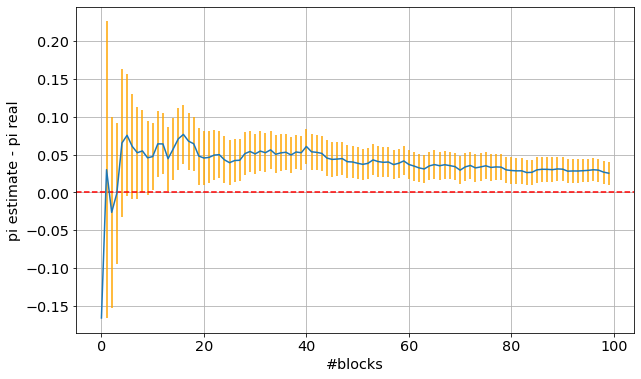

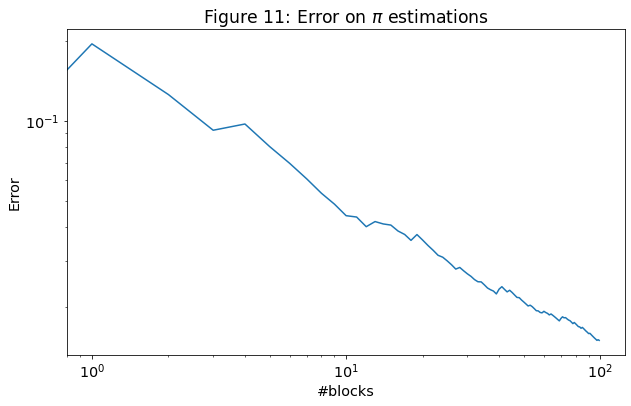

In [134]:
f, error = np.loadtxt("pi_averages&uncertainties.txt", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f - np.pi,yerr=error, ecolor='orange')
plt.xlabel('#blocks')
plt.axhline(0.0, color = 'red', linestyle = 'dashed')
plt.ylabel('pi estimate - pi real')
plt.grid(True)
plt.show()

plt.plot(x,error)
plt.title('Figure 11: Error on $\pi$ estimations')
plt.xlabel('#blocks')
plt.ylabel('Error')
plt.yscale('log')
plt.xscale('log')

The plot shows good compatibility between real value and computed value (within 2 sigmas).